In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('students_marks.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                          3
race/ethnicity                  3
parental level of education     6
lunch                          12
test preparation course         7
math score                      6
reading score                   8
writing score                   5
dtype: int64

In [6]:
df['gender']=df['gender'].fillna(df['gender'].mode()[0])

In [7]:
df['gender'].isnull().sum()

np.int64(0)

In [9]:
df.drop('race/ethnicity',axis=1,inplace=True)

In [10]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', nan],
      dtype=object)

In [11]:
df['parental level of education']=df['parental level of education'].fillna(df['parental level of education'].mode()[0])

In [12]:
df['parental level of education'].isnull().sum()

np.int64(0)

In [13]:
df.drop('lunch',axis=1,inplace=True)

In [14]:
df['test preparation course'].unique()

array(['none', 'completed', nan], dtype=object)

In [15]:
df['test preparation course']=df['test preparation course'].fillna(df['test preparation course'].mode()[0])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   parental level of education  1000 non-null   object 
 2   test preparation course      1000 non-null   object 
 3   math score                   994 non-null    float64
 4   reading score                992 non-null    float64
 5   writing score                995 non-null    float64
dtypes: float64(3), object(3)
memory usage: 47.0+ KB


In [18]:
numeric=df.select_dtypes(float)

<Axes: >

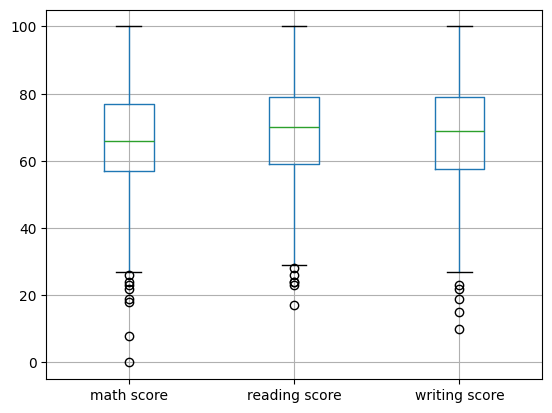

In [19]:
numeric.boxplot()

In [20]:
q1=np.percentile(df['math score'],25,method='midpoint')
q3=np.percentile(df['math score'],75,method='midpoint')
iqr=q3-q1
q1,q3,iqr

(np.float64(nan), np.float64(nan), np.float64(nan))

In [21]:
df['math score']=df['math score'].fillna(df['math score'].median())

In [22]:
q1=np.percentile(df['math score'],25,method='midpoint')
q3=np.percentile(df['math score'],75,method='midpoint')
iqr=q3-q1
q1,q3,iqr

(np.float64(57.0), np.float64(77.0), np.float64(20.0))

In [24]:
lower_limit=q1-(1.5*iqr)
upper_limit=q3+(1.5*iqr)
lower_limit,upper_limit

(np.float64(27.0), np.float64(107.0))

In [25]:
outliers=[]
for i in df['math score']:
    if i <lower_limit or i>upper_limit:
        outliers.append(i)
outliers    

[18.0, 0.0, 22.0, 24.0, 26.0, 19.0, 23.0, 8.0]

In [26]:
outlier_index=df[df['math score'].isin(outliers)].index

In [27]:
df.drop(outlier_index,inplace=True)

<Axes: ylabel='math score'>

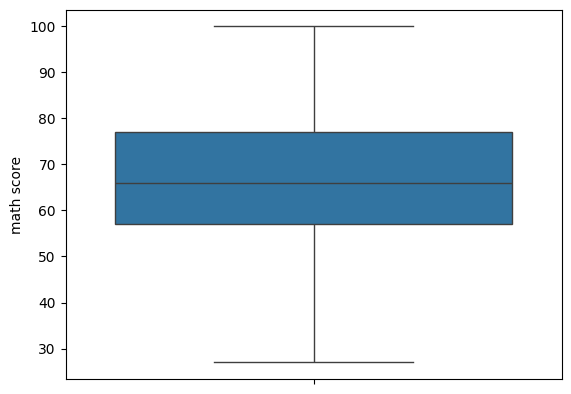

In [28]:
sns.boxplot(df['math score'])

In [32]:
df['total']=(df['math score']+df['writing score']+df['reading score'])/3

In [33]:
df.head()

,gender,parental level of education,test preparation course,math score,reading score,writing score,total
0,female,bachelor's degree,none,72.0,72.0,74.0,72.666667
1,female,some college,completed,69.0,90.0,88.0,82.333333
2,female,master's degree,none,90.0,95.0,93.0,92.666667
3,male,associate's degree,none,47.0,57.0,44.0,49.333333
4,male,some college,none,76.0,78.0,75.0,76.333333
